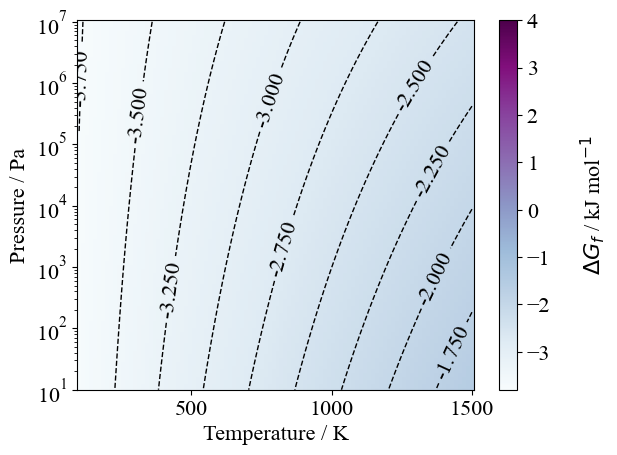

In [9]:
import numpy as np
from scripts.materials import solid, ideal_gas
from scripts.plot_potential import plot_potential
from scripts.utils import phonon_Jmol2eV

##Step1: convert phonopy calculated information
#phonon_Jmol2eV(file_in='phonopy_in/BaS.dat', file_out='phonopy_output/BaS_n.dat')

##Step2: Plot!
#For one example reaction
CZTS_kesterite = solid(name='Kesterite CZTS',
                        stoichiometry={'Cu':2,'Zn':1,'Sn':1,'S':4},
                        pbesol_energy_eV=-0.706480597450521e06,
                        fu_cell=2, #formula_unit in calculation cell
                        volume=310.86645888987351,
                        phonons='phonopy_output/czts-conventional.dat', #same name as file_out in the phonopy_output folder
                        N=8 #number of atoms per formula_unit
                       )

CZTS = CZTS_kesterite

Cu = solid(name='Cu',
           stoichiometry={'Cu':1},
           pbesol_energy_eV=-180838.168712673,
           fu_cell=4,
           volume=45.2576997892,
           phonons='phonopy_output/Cu.dat'
)

beta_Sn = solid(name='Beta Sn',
                stoichiometry={'Sn':1},
                pbesol_energy_eV=-0.340581412216286E+06,
                fu_cell=2,
                volume=53.538071915,
                phonons='phonopy_output/beta_Sn.dat'
)
Sn = beta_Sn

Zn = solid(name='Zn',
           stoichiometry={'Zn':1},
           pbesol_energy_eV=-0.981596036898606e05, 
           fu_cell=2,
           volume=28.2580218348,
           phonons='phonopy_output/Zn.dat'
)

S8=ideal_gas(
    name='S8',
    stoichiometry={'S':8},
    pbesol_energy_eV=-0.868936310037924e05,
    thermo_file='data/nist_janaf/S8.dat',
    zpe_pbesol=0.32891037,
    N=8
)

T = np.linspace(100,1500,100)    # K
P = np.array(np.logspace(1,7,100),ndmin=2).transpose() # Pa

#Recommended levels = 10 in kJ/mol unit; 
#Recommended levels = 0.01 in eV unit.
D_mu = CZTS.mu_eV(T,P) - (2*Cu.mu_eV(T,P) +
                                Zn.mu_eV(T,P) +
                                Sn.mu_eV(T,P) +
                                0.5*S8.mu_eV(T,P)
    )
D_mu_label = '$\Delta G_f$ / kJ mol$^{-1}$'
scale_range = [-3.80,4]

plot_potential(T,P,D_mu,D_mu_label,scale_range, filename='DG_CZTS_S8_new.png', color='BuPu')

